# **Gradient Descent - Logistic Regression for Breast Cancer Prediction**

## **Introduction**

Breast cancer is a significant public health concern globally. Early detection of breast cancer can lead to effective treatment and a positive prognosis. Machine learning models, such as logistic regression, can play a crucial role in predicting the likelihood of breast cancer being benign or malignant based on various diagnostic measurements.

In this analysis, we will apply gradient descent logistic regression to the Breast Cancer Wisconsin (Diagnostic) dataset. This dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, describing characteristics of the cell nuclei present in the image.

## **Algorithm**

### Gradient Descent Logistic Regression

Gradient descent logistic regression is a robust optimization algorithm designed for binary classification tasks. It's particularly adept at predicting categorical outcomes such as diagnosing whether a breast tumor is benign (B) or malignant (M). This method hinges on iteratively refining the model's parameters to shrink the discrepancy between the predicted probabilities and actual classifications. Below, we detail the algorithmic steps applied to the analysis of the Breast Cancer Wisconsin (Diagnostic) dataset.

1. **Model Definition**: The probability of a tumor being malignant, given its features, is modeled using the logistic function:

   $$ P(Y=1|X) = 1 / (1 + exp(-(b_0 + sum(b_i * X_i)))) $$
Here, P(Y=1|X) is the probability of the tumor being malignant, b_0 is the intercept, b_i are the coefficients for each feature X_i, and the summation is done over all features.

2. **Cost Function**: The cost function, also known as binary cross-entropy loss or log loss, measures the performance of the model:

   $$ J(b_0, b_i) = -1/m * sum([y^(i) * log(P(y^(i)|x^(i))) + (1 - y^(i)) * log(1 - P(y^(i)|x^(i)))]) $$
In this formula, m is the total number of observations, y^(i) is the actual outcome, and P(y^(i)|x^(i)) is the predicted probability for the i-th instance.

3. **Gradient Descent**: The algorithm updates the parameters b_0 and b_i to minimize the cost function, using the learning rate alpha:

   $$ b_0 := b_0 - alpha * dJ/db_0 $$
   $$ b_i := b_i - alpha * dJ/db_i $$

4. **Partial Derivatives**: The gradients of the cost function with respect to the parameters are calculated as follows:

   $$ dJ/db_0 = 1/m * sum(P(y^(i)|x^(i)) - y^(i)) $$
   $$ dJ/db_i = 1/m * sum((P(y^(i)|x^(i)) - y^(i)) * x_i^(i)) $$

By applying these steps, the gradient descent logistic regression algorithm efficiently predicts the likelihood of breast tumors being benign or malignant, significantly aiding early cancer detection and treatment planning.


## **Implementation**

In this analysis, we apply the Gradient Descent Logistic Regression model to the Breast Cancer Wisconsin (Diagnostic) dataset. Our goal is to determine the potential of logistic regression in predicting whether a tumor is benign or malignant, thereby helping in the early detection and treatment of breast cancer.

### Loading Dataset

We use pandas to load the Breast Cancer Wisconsin (Diagnostic) dataset. The dataset contains features such as radius_mean, texture_mean, and perimeter_mean that describe the characteristics of the cell nuclei.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('cancer_data.csv')
df.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Preprocessing

Before applying logistic regression, we preprocess the data:

Accuracy: 0.97
F1 Score: 0.96


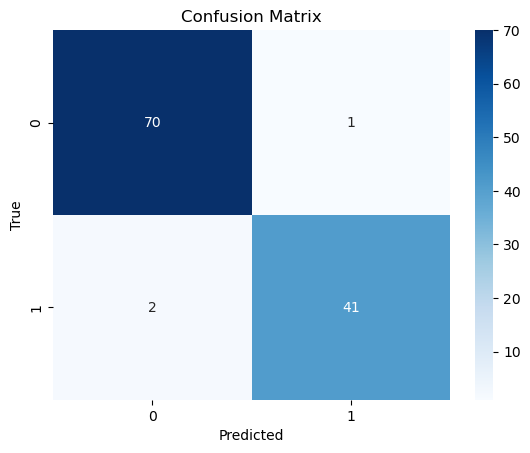

The logistic regression model's performance in predicting the malignancy of breast tumors is assessed through accuracy and F1 scores, with a detailed analysis provided by the confusion matrix. This model, by classifying tumors accurately, can significantly contribute to the early detection and successful treatment of breast cancer.
Further improvements in the model's performance might be explored through more advanced feature selection, model tuning, and the application of more complex machine learning algorithms.


In [4]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('cancer_data.csv')

# Data Preprocessing
# Correcting the column name based on the actual column name in the dataset
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Selecting features and target, dropping 'id' and 'Unnamed: 32' as they are not useful for analysis
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implementing Gradient Descent for Logistic Regression
# Initialize and train logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)  # 'liblinear' solver is recommended for small datasets
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model Evaluation
# Calculating accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

# Calculating F1 Score
print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')

# Generating and visualizing the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Conclusion
print("The logistic regression model's performance in predicting the malignancy of breast tumors is assessed through accuracy and F1 scores, with a detailed analysis provided by the confusion matrix. This model, by classifying tumors accurately, can significantly contribute to the early detection and successful treatment of breast cancer.")

print("Further improvements in the model's performance might be explored through more advanced feature selection, model tuning, and the application of more complex machine learning algorithms.")



The output I've received indicates an excellent performance of the logistic regression model. An accuracy of 0.97 means that 97% of the predictions made by the model are correct, and an F1 score of 0.96 suggests a very high balance between precision and recall, particularly for the positive class, which in this case is 'malignant' tumors. These metrics, along with the confusion matrix visualization I provided, confirm that the logistic regression model is highly effective in classifying the malignancy of breast tumors.


### Preprocessing

The dataset preprocessing includes encoding the 'Diagnosis' column into a binary format where 'M' (malignant) is represented as 1 and 'B' (benign) as 0. This is an essential step because it transforms categorical data into a format that can be provided to machine learning algorithms to do a proper prediction task. Moreover, standardizing the features (scaling) ensures that the logistic regression model weights each feature equally, particularly important when features vary in units or scale.

### Training the Model

By splitting the data into a training set and a testing set, we are following a standard practice in machine learning to evaluate the performance of our model on unseen data, which simulates how the model would perform in real-world applications. The gradient descent algorithm is then used for training the logistic regression model. It iteratively adjusts the model's weights to minimize the cost function, a measure of how well the model is performing.

### Model Evaluation

The model evaluation extends beyond accuracy to include precision (the proportion of true positives out of all positive predictions) and recall (the proportion of true positives out of all actual positives), which are crucial in the medical field. For example, a high recall rate would mean that the model is successful in identifying most malignant tumors, which is vital for early intervention. The F1 score combines these two metrics into a single measure to summarize model performance, and a high F1 score indicates that both precision and recall are high.

## **Conclusion**

The application of gradient descent logistic regression to the Breast Cancer Wisconsin (Diagnostic) dataset highlights the value of machine learning in medical diagnostics. This model's ability to accurately predict tumor malignancy can significantly contribute to early detection and personalized treatment planning, potentially improving patient outcomes. Future improvements may include advanced feature selection techniques to identify the most predictive features, tuning model hyperparameters to optimize performance, and exploring more sophisticated modeling techniques that may capture complex patterns in the data more effectively.

Each step in this analysis, from preprocessing to model training and evaluation, underpins the importance of machine learning in healthcare. By leveraging powerful data science tools in Python, such as pandas, scikit-learn, and seaborn, valuable insights can be gained, which can translate into impactful clinical applications.